In [2]:
import pandas as pd

In [3]:
df=pd.read_csv('Used_Bikes.csv')

In [4]:
df

,bike_name,price,city,kms_driven,owner,age,power,brand
0,TVS Star City Plus Dual Tone 110cc,35000.0,Ahmedabad,17654.0,First Owner,3.0,110.0,TVS
1,Royal Enfield Classic 350cc,119900.0,Delhi,11000.0,First Owner,4.0,350.0,Royal Enfield
2,Triumph Daytona 675R,600000.0,Delhi,110.0,First Owner,8.0,675.0,Triumph
3,TVS Apache RTR 180cc,65000.0,Bangalore,16329.0,First Owner,4.0,180.0,TVS
4,Yamaha FZ S V 2.0 150cc-Ltd. Edition,80000.0,Bangalore,10000.0,First Owner,3.0,150.0,Yamaha
...,...,...,...,...,...,...,...,...
32643,Hero Passion Pro 100cc,39000.0,Delhi,22000.0,First Owner,4.0,100.0,Hero
32644,TVS Apache RTR 180cc,30000.0,Karnal,6639.0,First Owner,9.0,180.0,TVS
32645,Bajaj Avenger Street 220,60000.0,Delhi,20373.0,First Owner,6.0,220.0,Bajaj
32646,Hero Super Splendor 125cc,15600.0,Jaipur,84186.0,First Owner,16.0,125.0,Hero


In [5]:
df.shape

(32648, 8)

In [6]:
df.isna().sum()

bike_name     0
price         0
city          0
kms_driven    0
owner         0
age           0
power         0
brand         0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32648 entries, 0 to 32647
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   bike_name   32648 non-null  object 
 1   price       32648 non-null  float64
 2   city        32648 non-null  object 
 3   kms_driven  32648 non-null  float64
 4   owner       32648 non-null  object 
 5   age         32648 non-null  float64
 6   power       32648 non-null  float64
 7   brand       32648 non-null  object 
dtypes: float64(4), object(4)
memory usage: 2.0+ MB


In [8]:
df.describe()

,price,kms_driven,age,power
count,3.264800e+04,32648.000000,32648.000000,32648.000000
mean,6.829542e+04,26344.625184,8.048211,213.511302
std,9.071860e+04,22208.527695,4.031700,134.428868
min,4.400000e+03,1.000000,1.000000,100.000000
25%,2.500000e+04,12000.000000,5.000000,150.000000
50%,4.300000e+04,20373.000000,7.000000,150.000000
75%,8.000000e+04,35000.000000,10.000000,220.000000
max,1.900000e+06,750000.000000,63.000000,1800.000000


In [9]:
df.columns

Index(['bike_name', 'price', 'city', 'kms_driven', 'owner', 'age', 'power',
       'brand'],
      dtype='object')

In [10]:
year_wise_sales = df.groupby('city').size()
year_wise_sales

city
24 Pargana      11
Abohar           2
Adalaj           5
Adoni            1
Adyar            3
                ..
Warangal         2
Wardha           4
Yamuna Nagar     2
Yemmiganur       1
Zirakpur         1
Length: 443, dtype: int64

In [11]:
company_wise_sales = df.groupby("brand").size().sort_values()
company_wise_sales

brand
Yezdi                  1
Rajdoot                1
LML                    1
Ideal                  2
Indian                 3
MV                     4
Jawa                  10
BMW                   16
Ducati                22
Triumph               26
Mahindra              55
Benelli               56
Hyosung               64
Kawasaki              79
Harley-Davidson      737
KTM                 1077
TVS                 1247
Suzuki              1464
Honda               2108
Yamaha              3916
Royal Enfield       4178
Hero                6368
Bajaj              11213
dtype: int64

array([<Axes: xlabel='No. of Cars', ylabel='Company'>], dtype=object)

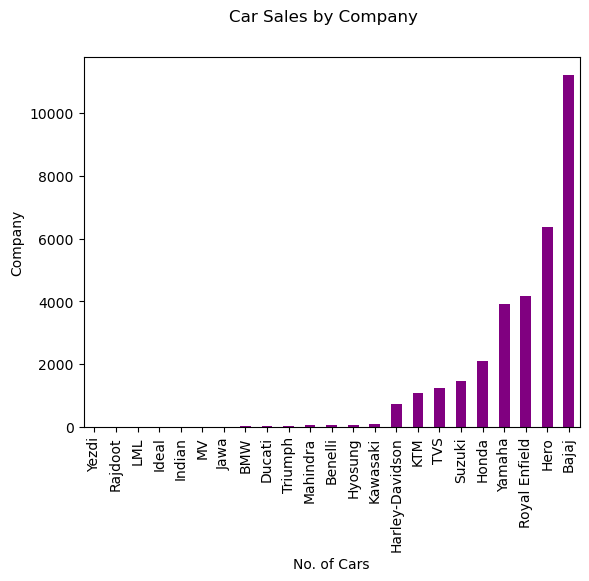

In [12]:
company_wise_sales.plot(
    kind="bar",
    xlabel="No. of Cars",
    ylabel="Company",
    title="Car Sales by Company",
    color="purple",
    subplots=True,
)

In [13]:
import matplotlib.pyplot as plt

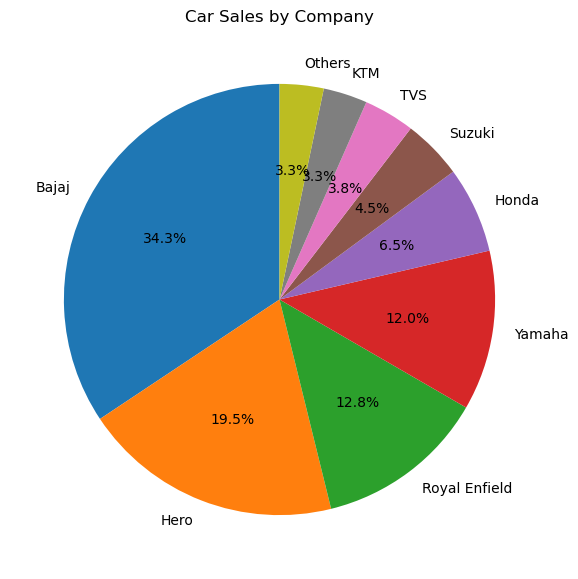

In [14]:
number_of_companies = 8
plt.figure(figsize=(10, 7))
company_wise_sales_pie = df.groupby("brand").size().sort_values(ascending=False).head(number_of_companies).copy()
company_wise_sales_pie.loc['Others'] = df.groupby("brand").size().sort_values(ascending=False).tail(-number_of_companies).sum()
company_wise_sales_pie.plot(kind='pie', autopct='%1.1f%%', startangle=90, title="Car Sales by Company")
plt.show()

In [15]:
df.head()

,bike_name,price,city,kms_driven,owner,age,power,brand
0,TVS Star City Plus Dual Tone 110cc,35000.0,Ahmedabad,17654.0,First Owner,3.0,110.0,TVS
1,Royal Enfield Classic 350cc,119900.0,Delhi,11000.0,First Owner,4.0,350.0,Royal Enfield
2,Triumph Daytona 675R,600000.0,Delhi,110.0,First Owner,8.0,675.0,Triumph
3,TVS Apache RTR 180cc,65000.0,Bangalore,16329.0,First Owner,4.0,180.0,TVS
4,Yamaha FZ S V 2.0 150cc-Ltd. Edition,80000.0,Bangalore,10000.0,First Owner,3.0,150.0,Yamaha


In [16]:
x_col = df["kms_driven"]
y_col = df["price"]

print(df[["kms_driven", "price"]])

       kms_driven     price
0         17654.0   35000.0
1         11000.0  119900.0
2           110.0  600000.0
3         16329.0   65000.0
4         10000.0   80000.0
...           ...       ...
32643     22000.0   39000.0
32644      6639.0   30000.0
32645     20373.0   60000.0
32646     84186.0   15600.0
32647     60857.0   22000.0

[32648 rows x 2 columns]


In [17]:
df['power'].value_counts()

power
150.0     8836
100.0     5047
220.0     4833
350.0     3706
125.0     2492
200.0     1357
160.0      969
180.0      829
390.0      829
250.0      826
400.0      729
750.0      701
110.0      432
500.0      369
135.0      137
223.0       99
650.0       82
410.0       68
300.0       61
310.0       44
883.0       30
535.0       23
1000.0      20
1200.0      14
800.0       13
600.0       11
295.0       10
320.0        9
1300.0       9
900.0        8
302.0        7
765.0        5
797.0        5
675.0        4
959.0        4
865.0        3
149.0        3
1130.0       3
502.0        2
899.0        2
850.0        2
1050.0       2
1262.0       2
796.0        2
1090.0       1
1198.0       1
175.0        1
1700.0       1
1100.0       1
1800.0       1
1299.0       1
821.0        1
107.0        1
Name: count, dtype: int64

In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [79]:
x=df[["kms_driven", "power", "city","brand","age","owner"]]
y=df["price"]

In [80]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)

In [81]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Define preprocessor
preprocessor = ColumnTransformer([
    # OneHotEncode categorical columns: 'brand' and 'city'
    ("onehot", OneHotEncoder(handle_unknown='ignore'), ["brand", "city","owner"]),
    # Standardize numerical columns: 'kms_driven', 'power', and 'age'
    ("scaler", StandardScaler(), ["kms_driven", "power", "age"])
])

# Define model pipeline
model = Pipeline([
    ("preprocessor", preprocessor),
    ("regressor", LinearRegression())
])


In [82]:
model.fit(X_train, y_train)
#y_pred = model.predict(X_test)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['brand', 'city', 'owner']),
                                                 ('scaler', StandardScaler(),
                                                  ['kms_driven', 'power',
                                                   'age'])])),
                ('regressor', LinearRegression())])

In [83]:
d=model.score(X_test, y_test)
y_pred = model.predict(X_test)

In [84]:
y_pred


array([ 57303.63467949,  57303.63467949,  85039.6971424 , ...,
        71955.73891196, 196160.59101495,   7982.31685659])

In [85]:
X_test

,kms_driven,power,city,brand,age,owner
25321,29134.0,220.0,Bangalore,Bajaj,7.0,First Owner
29406,29134.0,220.0,Bangalore,Bajaj,7.0,First Owner
9353,38000.0,350.0,Delhi,Royal Enfield,9.0,First Owner
19605,18000.0,350.0,Delhi,Royal Enfield,8.0,First Owner
5898,72400.0,350.0,Bangalore,Royal Enfield,10.0,First Owner
...,...,...,...,...,...,...
19953,3430.0,750.0,Jodhpur,Harley-Davidson,4.0,First Owner
30437,20245.0,220.0,Delhi,Bajaj,11.0,Second Owner
15705,13858.0,350.0,Mumbai,Royal Enfield,11.0,Second Owner
27183,13216.0,390.0,Mumbai,KTM,4.0,First Owner


In [86]:
y_pred[:10]

array([57303.63467949, 57303.63467949, 85039.6971424 , 91759.64381381,
       69435.23936515, 23201.16259046, 76530.78651585, 71402.51710902,
       43017.59491581, 27828.05777012])

In [87]:
import statsmodels.api as sm

In [88]:
# Encode categorical variables
X_train_encoded = pd.get_dummies(X_train, drop_first=True)
X_test_encoded = pd.get_dummies(X_test, drop_first=True)
X_overall_encoded = pd.get_dummies(x, drop_first=True)

# Add constant (intercept)
X_train_encoded = sm.add_constant(X_train_encoded)
X_test_encoded = sm.add_constant(X_test_encoded)
X_overall_encoded = sm.add_constant(X_overall_encoded)

# Force float dtype
X_train_encoded = X_train_encoded.astype(float)
X_test_encoded = X_test_encoded.astype(float)
X_overall_encoded = X_overall_encoded.astype(float)

y_train = y_train.astype(float)
y_test = y_test.astype(float)
y_overall = y.astype(float)

# Fit the model
model_sm_train = sm.OLS(y_train, X_train_encoded).fit()
model_sm_test = sm.OLS(y_test, X_test_encoded).fit()
model_sm_overall = sm.OLS(y_overall, X_overall_encoded).fit()

results = {
    "r2": [
        model_sm_train.rsquared,
        model_sm_test.rsquared,
        model_sm_overall.rsquared,
    ],
    "mae": [
        mean_absolute_error(y_train, model_sm_train.predict(X_train_encoded)),
        mean_absolute_error(y_test, model_sm_test.predict(X_test_encoded)),
        mean_absolute_error(y_overall, model_sm_overall.predict(X_overall_encoded)),
    ],
    "mse": [
        mean_squared_error(y_train, model_sm_train.predict(X_train_encoded)),
        mean_squared_error(y_test, model_sm_test.predict(X_test_encoded)),
        mean_squared_error(y_overall, model_sm_overall.predict(X_overall_encoded)),
    ],
}

results["rmse"] = np.sqrt(results["mse"])
results["r2_percent"] = [f"{val*100:.0f}%" for val in results["r2"]]

# Print Metrics
result_df = pd.DataFrame(
    {
        "Percentage Accuracy": results["r2_percent"],
        "R² Score": results["r2"],
        "MAE": results["mae"],
        "MSE": results["mse"],
        "RMSE": results["rmse"]
    },
    index=["Training", "Testing", "Overall"],
)
# result_df[["R² Score","MAE", "MSE", "RMSE"]].agg(lambda s: ['%.2f'%val for val in s]) # Formatting
result_df

,Percentage Accuracy,R² Score,MAE,MSE,RMSE
Training,92%,0.923330,9137.915280,6.398576e+08,25295.407457
Testing,91%,0.914506,10488.609692,6.639101e+08,25766.453080
Overall,92%,0.917387,9496.616589,6.798720e+08,26074.355549


In [91]:
import pandas as pd

# Define new test case
test_case = pd.DataFrame([{
    "kms_driven": 40000,
    "power": 650,
    "city": "Mumbai",
    "brand": "Royal Enfield",
    "age": 1,
    "owner": "Second Owner"
}])

# Predict the price
predicted_price = model.predict(test_case)

print(f"Predicted Price: ₹{predicted_price[0]:,.0f}")


Predicted Price: ₹237,888


In [68]:
import pandas as pd

# Define new test case
test_case = pd.DataFrame([{
    "kms_driven": 25000,
    "power": 400,
    "city": "Delhi",
    "brand": "Triumph",
    "age": 3
}])

# Predict the price
predicted_price = model.predict(test_case)

print(f"Predicted Price: ₹{predicted_price[0]:,.0f}")


Predicted Price: ₹620,270


In [78]:
import pandas as pd

# Define new test case
test_case = pd.DataFrame([{
    "kms_driven": 2300,
    "power": 125,
    "city": "Ahmedabad",
    "brand": "Bajaj",
    "age": 2
}])

# Predict the price
predicted_price = model.predict(test_case)

print(f"Predicted Price: ₹{predicted_price[0]:,.0f}")


Predicted Price: ₹41,123


In [32]:
df.head(10)

,bike_name,price,city,kms_driven,owner,age,power,brand
0,TVS Star City Plus Dual Tone 110cc,35000.0,Ahmedabad,17654.0,First Owner,3.0,110.0,TVS
1,Royal Enfield Classic 350cc,119900.0,Delhi,11000.0,First Owner,4.0,350.0,Royal Enfield
2,Triumph Daytona 675R,600000.0,Delhi,110.0,First Owner,8.0,675.0,Triumph
3,TVS Apache RTR 180cc,65000.0,Bangalore,16329.0,First Owner,4.0,180.0,TVS
4,Yamaha FZ S V 2.0 150cc-Ltd. Edition,80000.0,Bangalore,10000.0,First Owner,3.0,150.0,Yamaha
5,Yamaha FZs 150cc,53499.0,Delhi,25000.0,First Owner,6.0,150.0,Yamaha
6,Honda CB Hornet 160R ABS DLX,85000.0,Delhi,8200.0,First Owner,3.0,160.0,Honda
7,Hero Splendor Plus Self Alloy 100cc,45000.0,Delhi,12645.0,First Owner,3.0,100.0,Hero
8,Royal Enfield Thunderbird X 350cc,145000.0,Bangalore,9190.0,First Owner,3.0,350.0,Royal Enfield
9,Royal Enfield Classic Desert Storm 500cc,88000.0,Delhi,19000.0,Second Owner,7.0,500.0,Royal Enfield


In [33]:
y_pred[:10]

array([ 73930.18262533,  73930.18262533, 139860.08556735, 146009.76687306,
       130910.98564204,  29871.14007091,  87260.47028798,  82561.91803693,
        66611.84085235,  12382.70047582])

In [34]:
model.score(X_test, y_test)

0.7691072961628306

In [35]:
y_pred[:10]

array([ 73930.18262533,  73930.18262533, 139860.08556735, 146009.76687306,
       130910.98564204,  29871.14007091,  87260.47028798,  82561.91803693,
        66611.84085235,  12382.70047582])

In [36]:
y_test[:10]

25321    50000.0
29406    50000.0
9353     85000.0
19605    95500.0
5898     60000.0
14492    25000.0
6762     80000.0
22112    70000.0
30627    41000.0
4377     28000.0
Name: price, dtype: float64

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32648 entries, 0 to 32647
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   bike_name   32648 non-null  object 
 1   price       32648 non-null  float64
 2   city        32648 non-null  object 
 3   kms_driven  32648 non-null  float64
 4   owner       32648 non-null  object 
 5   age         32648 non-null  float64
 6   power       32648 non-null  float64
 7   brand       32648 non-null  object 
dtypes: float64(4), object(4)
memory usage: 2.0+ MB


In [38]:
df.describe

<bound method NDFrame.describe of                                   bike_name     price       city  kms_driven  \
0        TVS Star City Plus Dual Tone 110cc   35000.0  Ahmedabad     17654.0   
1               Royal Enfield Classic 350cc  119900.0      Delhi     11000.0   
2                      Triumph Daytona 675R  600000.0      Delhi       110.0   
3                      TVS Apache RTR 180cc   65000.0  Bangalore     16329.0   
4      Yamaha FZ S V 2.0 150cc-Ltd. Edition   80000.0  Bangalore     10000.0   
...                                     ...       ...        ...         ...   
32643                Hero Passion Pro 100cc   39000.0      Delhi     22000.0   
32644                  TVS Apache RTR 180cc   30000.0     Karnal      6639.0   
32645              Bajaj Avenger Street 220   60000.0      Delhi     20373.0   
32646             Hero Super Splendor 125cc   15600.0     Jaipur     84186.0   
32647                    Bajaj Pulsar 150cc   22000.0       Pune     60857.0   

     

In [39]:
df['brand'].value_counts()

brand
Bajaj              11213
Hero                6368
Royal Enfield       4178
Yamaha              3916
Honda               2108
Suzuki              1464
TVS                 1247
KTM                 1077
Harley-Davidson      737
Kawasaki              79
Hyosung               64
Benelli               56
Mahindra              55
Triumph               26
Ducati                22
BMW                   16
Jawa                  10
MV                     4
Indian                 3
Ideal                  2
Rajdoot                1
LML                    1
Yezdi                  1
Name: count, dtype: int64

In [40]:
df.shape

(32648, 8)

In [41]:
df[df['price'] == df['price'].max()]

,bike_name,price,city,kms_driven,owner,age,power,brand
367,Indian Chief Classic 1800cc,1900000.0,Chennai,1700.0,First Owner,6.0,1800.0,Indian


In [42]:
df[df["brand"] == df["brand"].max()]

,bike_name,price,city,kms_driven,owner,age,power,brand
5017,Yezdi Classic 250cc,68000.0,Ahmedabad,23.0,Third Owner,39.0,250.0,Yezdi


In [43]:
df[df['kms_driven'] == df['kms_driven'].max()]

,bike_name,price,city,kms_driven,owner,age,power,brand
7633,Hero Splendor Pro 100cc,18000.0,Delhi,750000.0,First Owner,10.0,100.0,Hero


In [44]:
df[df['kms_driven'] == df['kms_driven'].min()]

,bike_name,price,city,kms_driven,owner,age,power,brand
4257,Hero Passion Pro 100cc,39000.0,Nashik,1.0,Second Owner,10.0,100.0,Hero
5797,Hero Passion Plus 100cc,30000.0,Nashik,1.0,Second Owner,13.0,100.0,Hero


In [45]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32648 entries, 0 to 32647
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   bike_name   32648 non-null  object 
 1   price       32648 non-null  float64
 2   city        32648 non-null  object 
 3   kms_driven  32648 non-null  float64
 4   owner       32648 non-null  object 
 5   age         32648 non-null  float64
 6   power       32648 non-null  float64
 7   brand       32648 non-null  object 
dtypes: float64(4), object(4)
memory usage: 2.0+ MB


,price,kms_driven,age,power
count,3.264800e+04,32648.000000,32648.000000,32648.000000
mean,6.829542e+04,26344.625184,8.048211,213.511302
std,9.071860e+04,22208.527695,4.031700,134.428868
min,4.400000e+03,1.000000,1.000000,100.000000
25%,2.500000e+04,12000.000000,5.000000,150.000000
50%,4.300000e+04,20373.000000,7.000000,150.000000
75%,8.000000e+04,35000.000000,10.000000,220.000000
max,1.900000e+06,750000.000000,63.000000,1800.000000


In [46]:
df[df['age'] == df['age'].max()]

,bike_name,price,city,kms_driven,owner,age,power,brand
6689,Royal Enfield‎ Bullet 350cc,70000.0,Delhi,32000.0,Second Owner,63.0,350.0,Royal Enfield
6818,Royal Enfield‎ Bullet 350cc,70000.0,Delhi,32000.0,Second Owner,63.0,350.0,Royal Enfield


In [47]:
df['age'].value_counts()

age
4.0     5048
8.0     3806
6.0     3573
5.0     3390
9.0     3072
7.0     2791
3.0     1590
11.0    1572
12.0    1463
15.0    1321
16.0    1297
10.0    1083
13.0     782
14.0     739
19.0     614
2.0      385
17.0      41
18.0      25
1.0       10
24.0       8
20.0       7
43.0       4
37.0       3
39.0       3
27.0       3
41.0       3
23.0       3
25.0       3
38.0       2
63.0       2
30.0       1
34.0       1
31.0       1
22.0       1
26.0       1
Name: count, dtype: int64